# Data loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

df = pd.read_csv('/content/drive/MyDrive/airline.csv')
df.shape

(482011, 35)

In [ ]:
df.head(5)

,Unnamed: 0,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DELAY_NEW,ARR_TIME_BLK,DISTANCE,DISTANCE_GROUP,SEGMENT_NUMBER,AIRLINE_ID,CARRIER_NAME,PRCP_DEP,SNOW_DEP,SNWD_DEP,TMAX_DEP,TMIN_DEP,WDF2_DEP,WSF2_DEP,AWND_DEP,PRCP_ARR,SNOW_ARR,SNWD_ARR,TMAX_ARR,TMIN_ARR,WDF2_ARR,WSF2_ARR,AWND_ARR,ARR_DEL15
0,0,1,14,2,12889,13198,530.0,0.0,0.0,0001-0559,951.0,0.0,0900-0959,1139.0,5,1.0,19393,Southwest Airlines Co.,0.28,0.0,0.0,54.0,44.0,40.0,15.0,4.70,0.0,0.0,5.1,30.0,26.0,240.0,15.0,9.4,0
1,1,1,14,2,12889,13198,936.0,0.0,0.0,0900-0959,1410.0,0.0,1400-1459,1139.0,5,2.0,20416,Spirit Air Lines,0.28,0.0,0.0,54.0,44.0,40.0,15.0,4.70,0.0,0.0,5.1,30.0,26.0,240.0,15.0,9.4,0
2,2,1,14,2,12889,13198,928.0,0.0,0.0,0900-0959,1351.0,0.0,1300-1359,1139.0,5,2.0,19393,Southwest Airlines Co.,0.28,0.0,0.0,54.0,44.0,40.0,15.0,4.70,0.0,0.0,5.1,30.0,26.0,240.0,15.0,9.4,0
3,3,1,14,2,12889,13198,1941.0,0.0,0.0,1900-1959,2357.0,0.0,2300-2359,1139.0,5,5.0,19393,Southwest Airlines Co.,0.28,0.0,0.0,54.0,44.0,40.0,15.0,4.70,0.0,0.0,5.1,30.0,26.0,240.0,15.0,9.4,0
4,4,1,14,2,12264,13198,836.0,0.0,0.0,0800-0859,1027.0,0.0,1000-1059,926.0,4,2.0,20378,Mesa Airlines Inc.,0.00,0.0,7.9,34.0,15.0,10.0,14.1,4.92,0.0,0.0,5.1,30.0,26.0,240.0,15.0,9.4,0


# Trying to do Random Forest without feature encoding

In [ ]:
from sklearn.model_selection import train_test_split

y = df['ARR_DEL15']
X = df.drop(['MONTH','CARRIER_NAME', 'DEP_TIME_BLK', 'ARR_TIME_BLK', 'ARR_DELAY_NEW', 'ARR_DEL15', 'Unnamed: 0'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf= RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
clf.score(X_test, y_test)

0.9401923603561737

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
acc_sgd = round(accuracy_score(y_pred, y_test) * 100, 2)
acc_sgd

94.02

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[104004,    745],
       [  6462,   9292]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97    104749
           1       0.93      0.59      0.72     15754

    accuracy                           0.94    120503
   macro avg       0.93      0.79      0.84    120503
weighted avg       0.94      0.94      0.93    120503



In [ ]:
from sklearn.linear_model import SGDClassifier

svm_clf = SGDClassifier(random_state=42)
svm_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [ ]:
svm_clf.score(X_test, y_test)

0.9393791025949562

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = svm_clf.predict(X_test)
acc_sgd = round(accuracy_score(y_pred, y_test) * 100, 2)
acc_sgd

93.94

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[103438,   1311],
       [  5602,  10152]])

In [ ]:
len(df.AIRLINE_ID.unique())

17

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    104749
           1       0.90      0.66      0.76     15754

    accuracy                           0.95    120503
   macro avg       0.92      0.83      0.87    120503
weighted avg       0.94      0.95      0.94    120503



# Data preparation

In [ ]:
import regex as re
df = pd.read_csv('/content/drive/MyDrive/airline.csv')

In [ ]:
dep_airport_ohe = pd.get_dummies(df['ORIGIN_AIRPORT_ID'])
arr_airport_ohe = pd.get_dummies(df['DEST_AIRPORT_ID'])
dep_airport_ohe = dep_airport_ohe.rename(columns=lambda x: re.sub("^", "DEP_AIRPORT_", str(x)))
arr_airport_ohe = arr_airport_ohe.rename(columns=lambda x: re.sub("^", "ARR_AIRPORT_", str(x)))

In [ ]:
df = df.drop(['MONTH','CARRIER_NAME', 'ARR_DELAY_NEW', 'Unnamed: 0'], axis=1)
df = pd.concat([df, dep_airport_ohe], axis=1)
df = pd.concat([df, arr_airport_ohe], axis=1)

In [ ]:
df

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_TIME_BLK,DISTANCE,DISTANCE_GROUP,SEGMENT_NUMBER,AIRLINE_ID,PRCP_DEP,SNOW_DEP,SNWD_DEP,TMAX_DEP,TMIN_DEP,WDF2_DEP,WSF2_DEP,AWND_DEP,PRCP_ARR,SNOW_ARR,SNWD_ARR,TMAX_ARR,TMIN_ARR,WDF2_ARR,WSF2_ARR,AWND_ARR,ARR_DEL15,DEP_AIRPORT_10140,DEP_AIRPORT_10257,DEP_AIRPORT_10299,DEP_AIRPORT_10397,DEP_AIRPORT_10423,DEP_AIRPORT_10529,DEP_AIRPORT_10599,DEP_AIRPORT_10693,DEP_AIRPORT_10713,DEP_AIRPORT_10721,DEP_AIRPORT_10792,DEP_AIRPORT_10800,DEP_AIRPORT_10821,DEP_AIRPORT_10994,DEP_AIRPORT_11042,DEP_AIRPORT_11057,DEP_AIRPORT_11066,DEP_AIRPORT_11193,DEP_AIRPORT_11259,DEP_AIRPORT_11267,DEP_AIRPORT_11278,DEP_AIRPORT_11292,DEP_AIRPORT_11298,DEP_AIRPORT_11423,DEP_AIRPORT_11433,DEP_AIRPORT_11540,DEP_AIRPORT_11618,DEP_AIRPORT_11638,DEP_AIRPORT_11697,DEP_AIRPORT_11884,DEP_AIRPORT_11986,DEP_AIRPORT_11995,DEP_AIRPORT_11996,DEP_AIRPORT_12173,DEP_AIRPORT_12191,DEP_AIRPORT_12264,DEP_AIRPORT_12266,DEP_AIRPORT_12339,DEP_AIRPORT_12451,DEP_AIRPORT_12478,DEP_AIRPORT_12758,DEP_AIRPORT_12889,DEP_AIRPORT_12892,DEP_AIRPORT_12953,DEP_AIRPORT_12954,DEP_AIRPORT_12982,DEP_AIRPORT_12992,DEP_AIRPORT_13198,DEP_AIRPORT_13204,DEP_AIRPORT_13232,DEP_AIRPORT_13244,DEP_AIRPORT_13303,DEP_AIRPORT_13342,DEP_AIRPORT_13485,DEP_AIRPORT_13487,DEP_AIRPORT_13495,DEP_AIRPORT_13577,DEP_AIRPORT_13796,DEP_AIRPORT_13830,DEP_AIRPORT_13851,DEP_AIRPORT_13871,DEP_AIRPORT_13891,DEP_AIRPORT_13930,DEP_AIRPORT_13931,DEP_AIRPORT_14027,DEP_AIRPORT_14057,DEP_AIRPORT_14100,DEP_AIRPORT_14107,DEP_AIRPORT_14122,DEP_AIRPORT_14193,DEP_AIRPORT_14262,DEP_AIRPORT_14307,DEP_AIRPORT_14321,DEP_AIRPORT_14492,DEP_AIRPORT_14524,DEP_AIRPORT_14570,DEP_AIRPORT_14576,DEP_AIRPORT_14635,DEP_AIRPORT_14679,DEP_AIRPORT_14683,DEP_AIRPORT_14685,DEP_AIRPORT_14730,DEP_AIRPORT_14747,DEP_AIRPORT_14761,DEP_AIRPORT_14771,DEP_AIRPORT_14831,DEP_AIRPORT_14869,DEP_AIRPORT_14893,DEP_AIRPORT_14908,DEP_AIRPORT_15016,DEP_AIRPORT_15096,DEP_AIRPORT_15304,DEP_AIRPORT_15370,DEP_AIRPORT_15376,DEP_AIRPORT_15412,DEP_AIRPORT_15919,ARR_AIRPORT_10140,ARR_AIRPORT_10257,ARR_AIRPORT_10299,ARR_AIRPORT_10397,ARR_AIRPORT_10423,ARR_AIRPORT_10529,ARR_AIRPORT_10599,ARR_AIRPORT_10693,ARR_AIRPORT_10713,ARR_AIRPORT_10721,ARR_AIRPORT_10792,ARR_AIRPORT_10800,ARR_AIRPORT_10821,ARR_AIRPORT_10994,ARR_AIRPORT_11042,ARR_AIRPORT_11057,ARR_AIRPORT_11066,ARR_AIRPORT_11193,ARR_AIRPORT_11259,ARR_AIRPORT_11267,ARR_AIRPORT_11278,ARR_AIRPORT_11292,ARR_AIRPORT_11298,ARR_AIRPORT_11423,ARR_AIRPORT_11433,ARR_AIRPORT_11540,ARR_AIRPORT_11618,ARR_AIRPORT_11638,ARR_AIRPORT_11697,ARR_AIRPORT_11884,ARR_AIRPORT_11986,ARR_AIRPORT_11995,ARR_AIRPORT_11996,ARR_AIRPORT_12173,ARR_AIRPORT_12191,ARR_AIRPORT_12264,ARR_AIRPORT_12266,ARR_AIRPORT_12339,ARR_AIRPORT_12451,ARR_AIRPORT_12478,ARR_AIRPORT_12758,ARR_AIRPORT_12889,ARR_AIRPORT_12892,ARR_AIRPORT_12953,ARR_AIRPORT_12954,ARR_AIRPORT_12982,ARR_AIRPORT_12992,ARR_AIRPORT_13198,ARR_AIRPORT_13204,ARR_AIRPORT_13232,ARR_AIRPORT_13244,ARR_AIRPORT_13303,ARR_AIRPORT_13342,ARR_AIRPORT_13485,ARR_AIRPORT_13487,ARR_AIRPORT_13495,ARR_AIRPORT_13577,ARR_AIRPORT_13796,ARR_AIRPORT_13830,ARR_AIRPORT_13851,ARR_AIRPORT_13871,ARR_AIRPORT_13891,ARR_AIRPORT_13930,ARR_AIRPORT_13931,ARR_AIRPORT_14027,ARR_AIRPORT_14057,ARR_AIRPORT_14100,ARR_AIRPORT_14107,ARR_AIRPORT_14122,ARR_AIRPORT_14193,ARR_AIRPORT_14262,ARR_AIRPORT_14307,ARR_AIRPORT_14321,ARR_AIRPORT_14492,ARR_AIRPORT_14524,ARR_AIRPORT_14570,ARR_AIRPORT_14576,ARR_AIRPORT_14635,ARR_AIRPORT_14679,ARR_AIRPORT_14683,ARR_AIRPORT_14685,ARR_AIRPORT_14730,ARR_AIRPORT_14747,ARR_AIRPORT_14761,ARR_AIRPORT_14771,ARR_AIRPORT_14831,ARR_AIRPORT_14869,ARR_AIRPORT_14893,ARR_AIRPORT_14908,ARR_AIRPORT_15016,ARR_AIRPORT_15096,ARR_AIRPORT_15304,ARR_AIRPORT_15370,ARR_AIRPORT_15376,ARR_AIRPORT_15412,ARR_AIRPORT_15919
0,14,2,12889,13198,530.0,0.0,0.0,0001-0559,951.0,0900-0959,1139.0,5,1.0,19393,0.28,0.0,0.0,54.0,44.0,40.0,15.0,4.70,0.0,0.0,5.1,30.0,26.0,240.0,15.0,9.40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
dep_time_block = pd.get_dummies(df['DEP_TIME_BLK'])
arr_time_block = pd.get_dummies(df['ARR_TIME_BLK'])
dep_time_block = dep_time_block.rename(columns=lambda x: re.sub("^", "DEP_TIME_", str(x)))
arr_time_block = arr_time_block.rename(columns=lambda x: re.sub("^", "ARR_TIME_", str(x)))
df = pd.concat([df, dep_time_block], axis=1)
df = pd.concat([df, arr_time_block], axis=1)
df

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_TIME_BLK,DISTANCE,DISTANCE_GROUP,SEGMENT_NUMBER,AIRLINE_ID,PRCP_DEP,SNOW_DEP,SNWD_DEP,TMAX_DEP,TMIN_DEP,WDF2_DEP,WSF2_DEP,AWND_DEP,PRCP_ARR,SNOW_ARR,SNWD_ARR,TMAX_ARR,TMIN_ARR,WDF2_ARR,WSF2_ARR,AWND_ARR,ARR_DEL15,DEP_AIRPORT_10140,DEP_AIRPORT_10257,DEP_AIRPORT_10299,DEP_AIRPORT_10397,DEP_AIRPORT_10423,DEP_AIRPORT_10529,DEP_AIRPORT_10599,DEP_AIRPORT_10693,DEP_AIRPORT_10713,DEP_AIRPORT_10721,DEP_AIRPORT_10792,DEP_AIRPORT_10800,DEP_AIRPORT_10821,DEP_AIRPORT_10994,DEP_AIRPORT_11042,DEP_AIRPORT_11057,DEP_AIRPORT_11066,DEP_AIRPORT_11193,DEP_AIRPORT_11259,DEP_AIRPORT_11267,DEP_AIRPORT_11278,DEP_AIRPORT_11292,DEP_AIRPORT_11298,DEP_AIRPORT_11423,DEP_AIRPORT_11433,DEP_AIRPORT_11540,DEP_AIRPORT_11618,DEP_AIRPORT_11638,DEP_AIRPORT_11697,DEP_AIRPORT_11884,DEP_AIRPORT_11986,DEP_AIRPORT_11995,DEP_AIRPORT_11996,DEP_AIRPORT_12173,DEP_AIRPORT_12191,DEP_AIRPORT_12264,DEP_AIRPORT_12266,DEP_AIRPORT_12339,DEP_AIRPORT_12451,DEP_AIRPORT_12478,DEP_AIRPORT_12758,DEP_AIRPORT_12889,DEP_AIRPORT_12892,DEP_AIRPORT_12953,DEP_AIRPORT_12954,DEP_AIRPORT_12982,DEP_AIRPORT_12992,DEP_AIRPORT_13198,DEP_AIRPORT_13204,DEP_AIRPORT_13232,DEP_AIRPORT_13244,DEP_AIRPORT_13303,DEP_AIRPORT_13342,DEP_AIRPORT_13485,DEP_AIRPORT_13487,DEP_AIRPORT_13495,DEP_AIRPORT_13577,DEP_AIRPORT_13796,DEP_AIRPORT_13830,DEP_AIRPORT_13851,DEP_AIRPORT_13871,DEP_AIRPORT_13891,DEP_AIRPORT_13930,DEP_AIRPORT_13931,DEP_AIRPORT_14027,DEP_AIRPORT_14057,DEP_AIRPORT_14100,DEP_AIRPORT_14107,DEP_AIRPORT_14122,DEP_AIRPORT_14193,DEP_AIRPORT_14262,DEP_AIRPORT_14307,DEP_AIRPORT_14321,DEP_AIRPORT_14492,DEP_AIRPORT_14524,DEP_AIRPORT_14570,DEP_AIRPORT_14576,DEP_AIRPORT_14635,DEP_AIRPORT_14679,DEP_AIRPORT_14683,DEP_AIRPORT_14685,DEP_AIRPORT_14730,DEP_AIRPORT_14747,DEP_AIRPORT_14761,DEP_AIRPORT_14771,DEP_AIRPORT_14831,DEP_AIRPORT_14869,DEP_AIRPORT_14893,DEP_AIRPORT_14908,DEP_AIRPORT_15016,DEP_AIRPORT_15096,DEP_AIRPORT_15304,DEP_AIRPORT_15370,DEP_AIRPORT_15376,DEP_AIRPORT_15412,DEP_AIRPORT_15919,ARR_AIRPORT_10140,ARR_AIRPORT_10257,ARR_AIRPORT_10299,ARR_AIRPORT_10397,ARR_AIRPORT_10423,ARR_AIRPORT_10529,ARR_AIRPORT_10599,ARR_AIRPORT_10693,ARR_AIRPORT_10713,ARR_AIRPORT_10721,ARR_AIRPORT_10792,ARR_AIRPORT_10800,ARR_AIRPORT_10821,ARR_AIRPORT_10994,ARR_AIRPORT_11042,ARR_AIRPORT_11057,ARR_AIRPORT_11066,ARR_AIRPORT_11193,ARR_AIRPORT_11259,ARR_AIRPORT_11267,ARR_AIRPORT_11278,ARR_AIRPORT_11292,ARR_AIRPORT_11298,ARR_AIRPORT_11423,ARR_AIRPORT_11433,ARR_AIRPORT_11540,ARR_AIRPORT_11618,ARR_AIRPORT_11638,ARR_AIRPORT_11697,ARR_AIRPORT_11884,ARR_AIRPORT_11986,ARR_AIRPORT_11995,ARR_AIRPORT_11996,ARR_AIRPORT_12173,ARR_AIRPORT_12191,ARR_AIRPORT_12264,ARR_AIRPORT_12266,ARR_AIRPORT_12339,ARR_AIRPORT_12451,ARR_AIRPORT_12478,ARR_AIRPORT_12758,ARR_AIRPORT_12889,ARR_AIRPORT_12892,ARR_AIRPORT_12953,ARR_AIRPORT_12954,ARR_AIRPORT_12982,ARR_AIRPORT_12992,ARR_AIRPORT_13198,ARR_AIRPORT_13204,ARR_AIRPORT_13232,ARR_AIRPORT_13244,ARR_AIRPORT_13303,ARR_AIRPORT_13342,ARR_AIRPORT_13485,ARR_AIRPORT_13487,ARR_AIRPORT_13495,ARR_AIRPORT_13577,ARR_AIRPORT_13796,ARR_AIRPORT_13830,ARR_AIRPORT_13851,ARR_AIRPORT_13871,ARR_AIRPORT_13891,ARR_AIRPORT_13930,ARR_AIRPORT_13931,ARR_AIRPORT_14027,ARR_AIRPORT_14057,ARR_AIRPORT_14100,ARR_AIRPORT_14107,ARR_AIRPORT_14122,ARR_AIRPORT_14193,ARR_AIRPORT_14262,ARR_AIRPORT_14307,ARR_AIRPORT_14321,ARR_AIRPORT_14492,ARR_AIRPORT_14524,ARR_AIRPORT_14570,ARR_AIRPORT_14576,ARR_AIRPORT_14635,ARR_AIRPORT_14679,ARR_AIRPORT_14683,ARR_AIRPORT_14685,ARR_AIRPORT_14730,ARR_AIRPORT_14747,ARR_AIRPORT_14761,ARR_AIRPORT_14771,ARR_AIRPORT_14831,ARR_AIRPORT_14869,ARR_AIRPORT_14893,ARR_AIRPORT_14908,ARR_AIRPORT_15016,ARR_AIRPORT_15096,ARR_AIRPORT_15304,ARR_AIRPORT_15370,ARR_AIRPORT_15376,ARR_AIRPORT_15412,ARR_AIRPORT_15919,DEP_TIME_0001-0559,DEP_TIME_0600-0659,DEP_TIME_0700-0759,DEP_TIME_0800-0859,DEP_TIME_0900-0959,DEP_TIME_1000-1059,DEP_TIME_1100-1159,DEP_TIME_1200-1259,DEP_TIME_1300-1359,DEP_TIME_1400-1459,DEP_TIME_1500-1559,DEP

In [ ]:
df.drop(['ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'DEP_TIME', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_TIME_BLK'], axis=1, inplace=True)
df

,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY_NEW,DEP_DEL15,DISTANCE,DISTANCE_GROUP,SEGMENT_NUMBER,AIRLINE_ID,PRCP_DEP,SNOW_DEP,SNWD_DEP,TMAX_DEP,TMIN_DEP,WDF2_DEP,WSF2_DEP,AWND_DEP,PRCP_ARR,SNOW_ARR,SNWD_ARR,TMAX_ARR,TMIN_ARR,WDF2_ARR,WSF2_ARR,AWND_ARR,ARR_DEL15,DEP_AIRPORT_10140,DEP_AIRPORT_10257,DEP_AIRPORT_10299,DEP_AIRPORT_10397,DEP_AIRPORT_10423,DEP_AIRPORT_10529,DEP_AIRPORT_10599,DEP_AIRPORT_10693,DEP_AIRPORT_10713,DEP_AIRPORT_10721,DEP_AIRPORT_10792,DEP_AIRPORT_10800,DEP_AIRPORT_10821,DEP_AIRPORT_10994,DEP_AIRPORT_11042,DEP_AIRPORT_11057,DEP_AIRPORT_11066,DEP_AIRPORT_11193,DEP_AIRPORT_11259,DEP_AIRPORT_11267,DEP_AIRPORT_11278,DEP_AIRPORT_11292,DEP_AIRPORT_11298,DEP_AIRPORT_11423,DEP_AIRPORT_11433,DEP_AIRPORT_11540,DEP_AIRPORT_11618,DEP_AIRPORT_11638,DEP_AIRPORT_11697,DEP_AIRPORT_11884,DEP_AIRPORT_11986,DEP_AIRPORT_11995,DEP_AIRPORT_11996,DEP_AIRPORT_12173,DEP_AIRPORT_12191,DEP_AIRPORT_12264,DEP_AIRPORT_12266,DEP_AIRPORT_12339,DEP_AIRPORT_12451,DEP_AIRPORT_12478,DEP_AIRPORT_12758,DEP_AIRPORT_12889,DEP_AIRPORT_12892,DEP_AIRPORT_12953,DEP_AIRPORT_12954,DEP_AIRPORT_12982,DEP_AIRPORT_12992,DEP_AIRPORT_13198,DEP_AIRPORT_13204,DEP_AIRPORT_13232,DEP_AIRPORT_13244,DEP_AIRPORT_13303,DEP_AIRPORT_13342,DEP_AIRPORT_13485,DEP_AIRPORT_13487,DEP_AIRPORT_13495,DEP_AIRPORT_13577,DEP_AIRPORT_13796,DEP_AIRPORT_13830,DEP_AIRPORT_13851,DEP_AIRPORT_13871,DEP_AIRPORT_13891,DEP_AIRPORT_13930,DEP_AIRPORT_13931,DEP_AIRPORT_14027,DEP_AIRPORT_14057,DEP_AIRPORT_14100,DEP_AIRPORT_14107,DEP_AIRPORT_14122,DEP_AIRPORT_14193,DEP_AIRPORT_14262,DEP_AIRPORT_14307,DEP_AIRPORT_14321,DEP_AIRPORT_14492,DEP_AIRPORT_14524,DEP_AIRPORT_14570,DEP_AIRPORT_14576,DEP_AIRPORT_14635,DEP_AIRPORT_14679,DEP_AIRPORT_14683,DEP_AIRPORT_14685,DEP_AIRPORT_14730,DEP_AIRPORT_14747,DEP_AIRPORT_14761,DEP_AIRPORT_14771,DEP_AIRPORT_14831,DEP_AIRPORT_14869,DEP_AIRPORT_14893,DEP_AIRPORT_14908,DEP_AIRPORT_15016,DEP_AIRPORT_15096,DEP_AIRPORT_15304,DEP_AIRPORT_15370,DEP_AIRPORT_15376,DEP_AIRPORT_15412,DEP_AIRPORT_15919,ARR_AIRPORT_10140,ARR_AIRPORT_10257,ARR_AIRPORT_10299,ARR_AIRPORT_10397,ARR_AIRPORT_10423,ARR_AIRPORT_10529,ARR_AIRPORT_10599,ARR_AIRPORT_10693,ARR_AIRPORT_10713,ARR_AIRPORT_10721,ARR_AIRPORT_10792,ARR_AIRPORT_10800,ARR_AIRPORT_10821,ARR_AIRPORT_10994,ARR_AIRPORT_11042,ARR_AIRPORT_11057,ARR_AIRPORT_11066,ARR_AIRPORT_11193,ARR_AIRPORT_11259,ARR_AIRPORT_11267,ARR_AIRPORT_11278,ARR_AIRPORT_11292,ARR_AIRPORT_11298,ARR_AIRPORT_11423,ARR_AIRPORT_11433,ARR_AIRPORT_11540,ARR_AIRPORT_11618,ARR_AIRPORT_11638,ARR_AIRPORT_11697,ARR_AIRPORT_11884,ARR_AIRPORT_11986,ARR_AIRPORT_11995,ARR_AIRPORT_11996,ARR_AIRPORT_12173,ARR_AIRPORT_12191,ARR_AIRPORT_12264,ARR_AIRPORT_12266,ARR_AIRPORT_12339,ARR_AIRPORT_12451,ARR_AIRPORT_12478,ARR_AIRPORT_12758,ARR_AIRPORT_12889,ARR_AIRPORT_12892,ARR_AIRPORT_12953,ARR_AIRPORT_12954,ARR_AIRPORT_12982,ARR_AIRPORT_12992,ARR_AIRPORT_13198,ARR_AIRPORT_13204,ARR_AIRPORT_13232,ARR_AIRPORT_13244,ARR_AIRPORT_13303,ARR_AIRPORT_13342,ARR_AIRPORT_13485,ARR_AIRPORT_13487,ARR_AIRPORT_13495,ARR_AIRPORT_13577,ARR_AIRPORT_13796,ARR_AIRPORT_13830,ARR_AIRPORT_13851,ARR_AIRPORT_13871,ARR_AIRPORT_13891,ARR_AIRPORT_13930,ARR_AIRPORT_13931,ARR_AIRPORT_14027,ARR_AIRPORT_14057,ARR_AIRPORT_14100,ARR_AIRPORT_14107,ARR_AIRPORT_14122,ARR_AIRPORT_14193,ARR_AIRPORT_14262,ARR_AIRPORT_14307,ARR_AIRPORT_14321,ARR_AIRPORT_14492,ARR_AIRPORT_14524,ARR_AIRPORT_14570,ARR_AIRPORT_14576,ARR_AIRPORT_14635,ARR_AIRPORT_14679,ARR_AIRPORT_14683,ARR_AIRPORT_14685,ARR_AIRPORT_14730,ARR_AIRPORT_14747,ARR_AIRPORT_14761,ARR_AIRPORT_14771,ARR_AIRPORT_14831,ARR_AIRPORT_14869,ARR_AIRPORT_14893,ARR_AIRPORT_14908,ARR_AIRPORT_15016,ARR_AIRPORT_15096,ARR_AIRPORT_15304,ARR_AIRPORT_15370,ARR_AIRPORT_15376,ARR_AIRPORT_15412,ARR_AIRPORT_15919,DEP_TIME_0001-0559,DEP_TIME_0600-0659,DEP_TIME_0700-0759,DEP_TIME_0800-0859,DEP_TIME_0900-0959,DEP_TIME_1000-1059,DEP_TIME_1100-1159,DEP_TIME_1200-1259,DEP_TIME_1300-1359,DEP_TIME_1400-1459,DEP_TIME_1500-1559,DEP_TIME_1600-1659,DEP_TIME_1700-1759,DEP_TIME_1800-1859,DEP_TIME_1900-1959,DEP_T

# Random Forest

In [ ]:
from sklearn.model_selection import train_test_split

y = df['ARR_DEL15']
X = df.drop(['ARR_DEL15', 'ARR_TIME_Nan'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(max_depth=20, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = forest_clf.predict(X_test)
acc_sgd = round(accuracy_score(y_pred, y_test) * 100, 2)
acc_sgd

94.62

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    104749
           1       0.90      0.66      0.76     15754

    accuracy                           0.95    120503
   macro avg       0.93      0.83      0.87    120503
weighted avg       0.94      0.95      0.94    120503



In [ ]:
import rfpimp
rfpimp.importances(forest_clf, X_test, y_test)

,Importance
Feature,
DEP_DELAY_NEW,0.0934
DEP_DEL15,0.0256
DAY_OF_MONTH,0.0016
DAY_OF_WEEK,0.0010
WSF2_DEP,0.0010
...,...
ARR_TIME_1800-1859,-0.0002
ARR_AIRPORT_14679,-0.0002
DEP_TIME_2000-2059,-0.0002


# SGDClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

y = df['ARR_DEL15']
X = df.drop(['ARR_DEL15', 'ARR_TIME_Nan'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

sgd_clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
sgd_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

In [ ]:
y_pred = sgd_clf.predict(X_test)
acc_sgd = round(accuracy_score(y_pred, y_test) * 100, 2)
acc_sgd

94.27

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    104749
           1       0.91      0.62      0.74     15754

    accuracy                           0.94    120503
   macro avg       0.93      0.81      0.85    120503
weighted avg       0.94      0.94      0.94    120503



In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[103812,    937],
       [  5970,   9784]])

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg_clf = LogisticRegression(solver="lbfgs", random_state=42, max_iter=1000)
log_reg_clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_pred = log_reg_clf.predict(X_test)
acc_log_reg = round(accuracy_score(y_pred, y_test) * 100, 2)
acc_log_reg

94.37

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    104749
           1       0.89      0.65      0.75     15754

    accuracy                           0.94    120503
   macro avg       0.92      0.82      0.86    120503
weighted avg       0.94      0.94      0.94    120503



In [ ]:
confusion_matrix(y_test, y_pred)

array([[103460,   1289],
       [  5494,  10260]])

In [ ]:
forest_clf.predict([X_test.iloc[1250]])


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_pred, y_test)

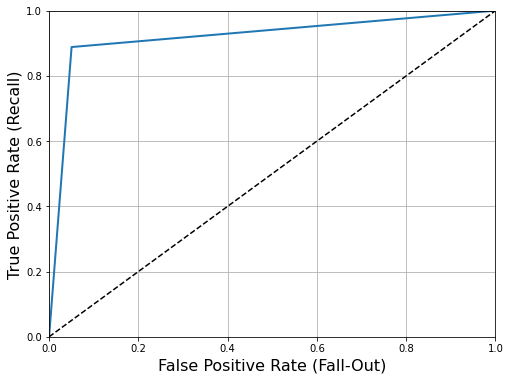

In [ ]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positives', fontsize=16)
    plt.ylabel('True Positives', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': [2, 5, 10, 25, 50, 100], 'min_samples_split': [2, 3, 4]}
dec_tree_clf = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

dec_tree_clf.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 5, 10, 25, 50, 100],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [ ]:
y_pred = dec_tree_clf.predict(X_test)
acc_dec_tree = round(accuracy_score(y_pred, y_test) * 100, 2)
acc_dec_tree

94.47

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    104749
           1       0.90      0.65      0.75     15754

    accuracy                           0.94    120503
   macro avg       0.92      0.82      0.86    120503
weighted avg       0.94      0.94      0.94    120503



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=20, random_state=42)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=20, random_state=42)

In [ ]:
y_pred = gb_clf.predict(X_test)
acc_dec_tree = round(accuracy_score(y_pred, y_test) * 100, 2)
acc_dec_tree

94.46

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    104749
           1       0.92      0.63      0.75     15754

    accuracy                           0.94    120503
   macro avg       0.93      0.81      0.86    120503
weighted avg       0.94      0.94      0.94    120503

